## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».  
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!  
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:  
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);  
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).  
С помощью модели нужно отобрать коров по двум критериям:  
средний удой за год — не менее 6000 килограммов;  
молоко должно быть вкусным.  

## Описание данных

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:  
id — уникальный идентификатор коровы.  
Удой, кг — масса молока, которую корова даёт в год (в килограммах).  
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.  
Сырой протеин, г — содержание сырого протеина в корме (в граммах).  
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.  
Порода — порода коровы.  
Тип пастбища — ландшафт лугов, на которых паслась корова.  
порода папы_быка — порода папы коровы.  
Жирность,% — содержание жиров в молоке (в процентах).  
Белок,% — содержание белков в молоке (в процентах).  
Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).  
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
Признаки в датасете ferma_main.csv можно разделить на группы.  
Характеристики коровы: id, Порода, порода папы_быка, Возраст.  
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).  
Характеристика пастбища: Тип пастбища.  
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.  
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.  
  
Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:  
id — уникальный идентификатор коровы.  
Имя Папы — имя папы коровы.  
  
Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:  
Порода — порода коровы.  
Тип пастбища — ландшафт лугов, на которых паслась к рова.  
порода папы_быка — порода папы коровы.  
Имя_папы — имя папы коровы.  
Текущая_жирность,% — содержание жиров в молоке (в процентах).  
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).  
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
  
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.  
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.  
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют.   Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.  
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!  

## Загрузка данных

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score 

In [4]:
data_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';')
data_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
data_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
data_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
data_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
data_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Данных для выполнения исследовательской работы достаточно. В данных есть небольшие проблемы, которые необходимо устранить для успешного выполнения работы

In [6]:
data_ferma.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


##  Предобработка данных

In [7]:
print(data_ferma.info())
print(data_dad.info())
print(data_cow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [8]:
data_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Переименование столбцов

In [9]:
#В данных наблюдается различие в названиях столбцов, исправим это. Приведем все к нижнему регистру и заменим пробелы на _
#Оставим русский язык в названиях
data_ferma.columns = data_ferma.columns.str.replace(' ', '_').str.lower()
data_dad.columns = data_dad.columns.str.replace(' ', '_').str.lower()
data_cow.columns = data_cow.columns.str.replace(' ', '_').str.lower()
data_ferma.rename(columns = {'спо_(сахаро-протеиновое_соотношение)':'спо', 
                             'эке_(энергетическая_кормовая_единица)':'эке', 
                             'удой,_кг':'удой', 
                             'сырой_протеин,_г':'сырой_протеин',
                            'жирность,%':'жирность', 
                             'белок,%':'белок'
                            }, 
                  inplace = True )

#Устраню также несоответсвие названий в двух датафреймах, надеюсь это потом понадобится
data_cow.rename(columns = {'текущая_жирность,%':'жирность',
                           'текущий_уровень_белок,%': 'белок'
                          }, 
                  inplace = True )

### Изменение типа данных

In [10]:
#Приведем тип данных
data_ferma['эке'] = data_ferma['эке'].str.replace(',', '.').astype('float')
data_ferma['спо'] = data_ferma['спо'].str.replace(',', '.').astype('float')
data_ferma['жирность'] = data_ferma['жирность'].str.replace(',', '.').astype('float')
data_ferma['белок'] = data_ferma['белок'].str.replace(',', '.').astype('float')

data_cow['жирность'] = data_cow['жирность'].str.replace(',', '.').astype('float')
data_cow['белок'] = data_cow['белок'].str.replace(',', '.').astype('float')

In [11]:
data_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Дубликаты

Обработаем неявные дубликаты в столбце тип_пастбища

In [12]:
data_ferma['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [13]:
data_ferma.loc[data_ferma['тип_пастбища'] == 'Равнинные', 'тип_пастбища'] = 'Равнинное'

Обработаем неявные дубликаты в столбце порода_папы_быка

In [14]:
data_ferma['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [15]:
data_ferma.loc[data_ferma['порода_папы_быка'] == 'Айдиал', 'порода_папы_быка'] = 'Айдиалл'

In [16]:
#Неявные дубликаты обработаны, теперь можно удалить явные
data_ferma = data_ferma.drop_duplicates()
data_dad = data_dad.drop_duplicates()
data_cow = data_cow.drop_duplicates()

### Аномалии

              id          удой         эке  сырой_протеин         спо  \
count  629.00000    629.000000  629.000000     629.000000  629.000000   
mean   315.00000   6188.750397   14.543879    1923.364070    0.913116   
std    181.72094   1644.795489    1.306408     182.956251    0.032203   
min      1.00000   5204.000000   10.900000    1660.000000    0.840000   
25%    158.00000   5751.000000   13.500000    1771.000000    0.890000   
50%    315.00000   6133.000000   14.700000    1888.000000    0.930000   
75%    472.00000   6501.000000   15.600000    2062.000000    0.940000   
max    629.00000  45616.000000   16.800000    2349.000000    0.960000   

         жирность       белок  
count  629.000000  629.000000  
mean     3.603657    3.075671  
std      0.168656    0.002549  
min      2.990000    3.069000  
25%      3.590000    3.074000  
50%      3.650000    3.076000  
75%      3.720000    3.077000  
max      3.750000    3.085000  


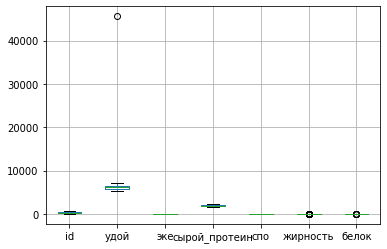

In [17]:
print(data_ferma.describe())
data_ferma.boxplot()
None

        жирность      белок
count  16.000000  16.000000
mean    3.571875   3.068250
std     0.141620   0.011264
min     3.340000   3.046000
25%     3.415000   3.059500
50%     3.585000   3.073500
75%     3.692500   3.076750
max     3.770000   3.081000


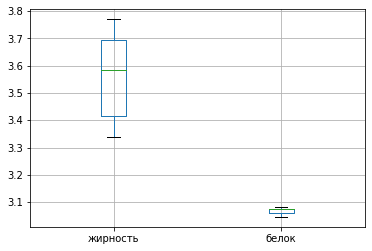

In [18]:
print(data_cow.describe())
data_cow.boxplot()
None

Была обнаружена только одна серьезная аномалия, сложно сказать причину ее происхождения, врдя ли кто-то просто дописал еще одну цифру случайно, потому что если мы разделим на 10 это число получится сильно меньше минимального значения, поэтому предлагаю просто удалить его.

In [19]:
data_ferma = data_ferma.query('удой < 45000') 

### Вывод. Предобработка данных

В ходе предобработки данных названия стоблцов были приведены к нижнему регистру и изменены для удобства дальнейшего исследования.   
Был изменен тип данных на числовой у тех столбцов, в которых хранились числа формата object.   
Были исследованы явные и неявные дубликаты, устранена аномалия в столбце удой.

In [20]:
data_ferma.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


## Исследовательский анализ данных

### Удой

In [21]:
data_ferma['удой'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

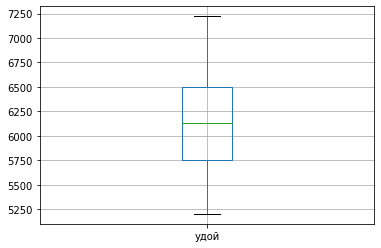

In [22]:
data_ferma.boxplot(column = 'удой')

None

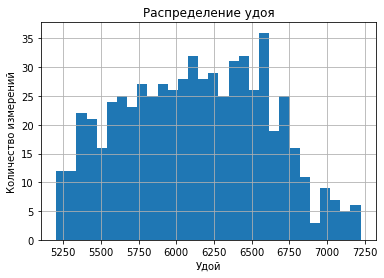

In [23]:
data_ferma['удой'].hist(bins = 30)
plt.title("Распределение удоя")
plt.ylabel("Количество измерений")
plt.xlabel("Удой")
None

Распределение графика похоже на нормальное, что говорит о достоверности графика. Наблюдается небольшой пик в области 6600. Выбросов замеченно не было

### Эке

In [24]:
data_ferma['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

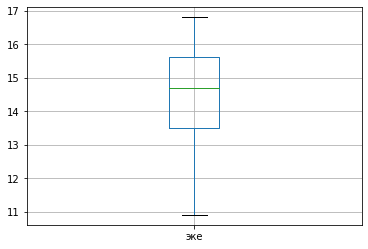

In [25]:
data_ferma.boxplot(column = 'эке')
None

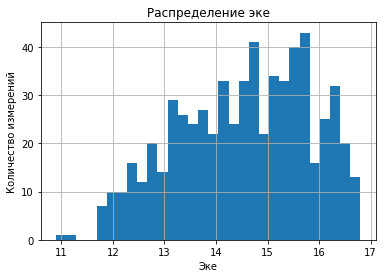

In [26]:
data_ferma['эке'].hist(bins = 30)
plt.title("Распределение эке")
plt.ylabel("Количество измерений")
plt.xlabel("Эке")
None

В целом распределение выглядит нормальным, что может говорить о достоверности графика. Как и в предыдущем случае, выбросов замеченно не было 

### Сырой протеин 

In [27]:
data_ferma['сырой_протеин'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64

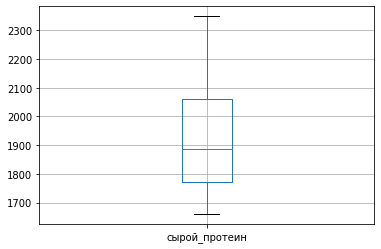

In [28]:
data_ferma.boxplot(column = 'сырой_протеин')
None

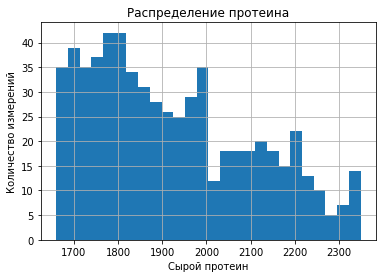

In [29]:
data_ferma['сырой_протеин'].hist(bins = 26)
plt.title("Распределение протеина")
plt.ylabel("Количество измерений")
plt.xlabel("Сырой протеин")
None

Распределение похоже на бимодальное распределение, с двумя пиками. Думаю, здесь просматривается 2-3 кластера, которые объясняются схемами кормления.

### Жирность

In [30]:
data_ferma['жирность'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

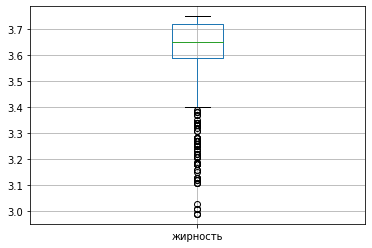

In [31]:
data_ferma.boxplot(column = 'жирность')
None

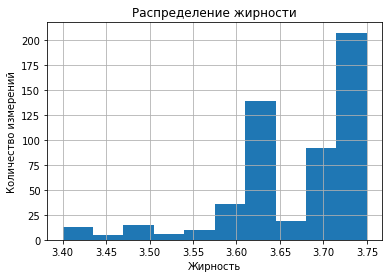

In [32]:
#График ящик с усами показал что данные ниже 3.4 можно счиать выбросами, поэтому удалим их
data_ferma = data_ferma.query('жирность >= 3.4')
data_ferma['жирность'].hist(bins = 10)
plt.title("Распределение жирности")
plt.ylabel("Количество измерений")
plt.xlabel("Жирность")
None

Были обнаружены и удалены выбросы. График выглядит немного нетипично, с небольшим провалов в области 3.65. Данные действительно склонны делиться на кластеры. Поэтому для некоторых признаков будет полезна категоризация.

### Белок

In [33]:
data_ferma['белок'].describe()

count    542.000000
mean       3.075651
std        0.002550
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

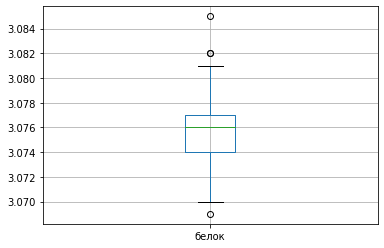

In [34]:
data_ferma.boxplot(column = 'белок')
None

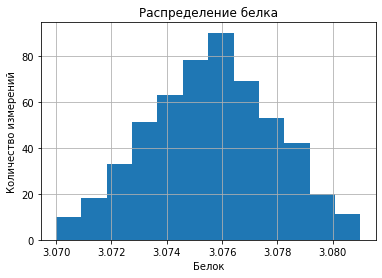

In [35]:
#График ящик с усами показал что данные ниже 3.070 и выше 3.081 можно считать выбросами, поэтому удалим их
data_ferma = data_ferma.query('белок >= 3.070 & белок <= 3.081')
data_ferma['белок'].hist(bins = 12)
plt.title("Распределение белка")
plt.ylabel("Количество измерений")
plt.xlabel("Белок")
None

Были обнаружены и удалены некоторые выбросы. График имеет практически идеальное нормальное распределние, что говорит о его доставерности

### Тип пастбища

In [36]:
data_ferma['тип_пастбища'].describe()

count           538
unique            2
top       Холмистое
freq            299
Name: тип_пастбища, dtype: object

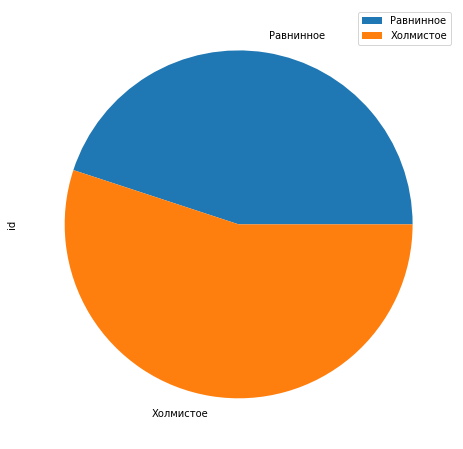

In [37]:
data_ferma.pivot_table(index='тип_пастбища', values='id', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(8,8))
None

С небольшим перевесом преобладает холмистый тип пасбища

### Порода

In [38]:
data_ferma['порода'].describe()

count                538
unique                 2
top       Вис Бик Айдиал
freq                 318
Name: порода, dtype: object

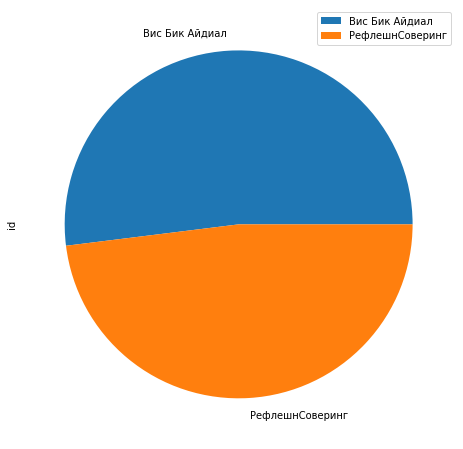

In [39]:
data_ferma.pivot_table(index='порода', values='id', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(8,8))
None

С небольшим перевесом преобладает тип породы РефлешнСоверинг

### Порода папы быка

In [40]:
data_ferma['порода_папы_быка'].describe()

count         538
unique          2
top       Айдиалл
freq          277
Name: порода_папы_быка, dtype: object

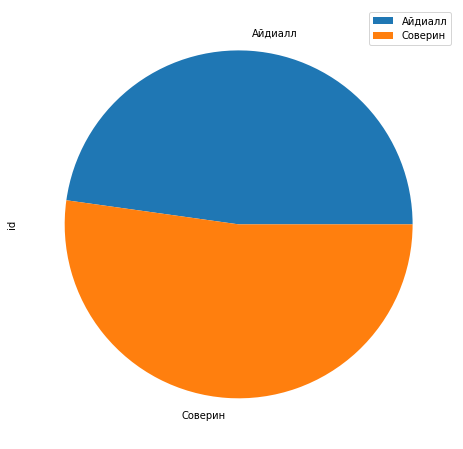

In [41]:
data_ferma.pivot_table(index='порода_папы_быка', values='id', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(8,8))
None

С небольшим перевесом преобладает тип породы Айдиал

### Вкус молока

In [42]:
data_ferma['вкус_молока'].describe()


count        538
unique         2
top       вкусно
freq         322
Name: вкус_молока, dtype: object

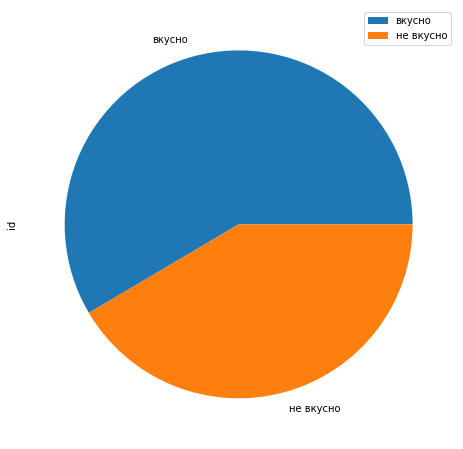

In [43]:
data_ferma.pivot_table(index='вкус_молока', values='id', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(8,8))
None

Вкусного молока немного больше чем не вкусного

### Bозраст

In [44]:
data_ferma['возраст'].describe()

count             538
unique              2
top       более_2_лет
freq              481
Name: возраст, dtype: object

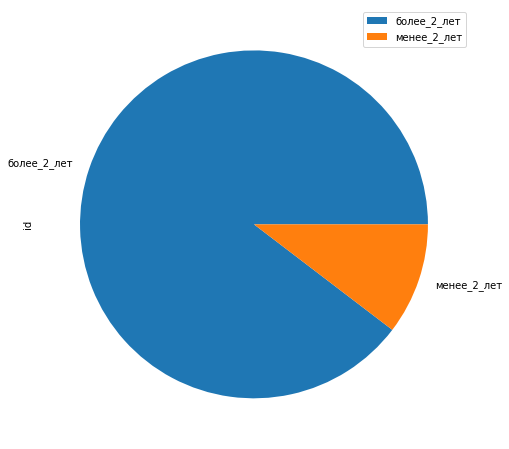

In [45]:
data_ferma.pivot_table(index='возраст', values='id', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(8,8))
None

Коров старше двух лет гораздо больше чем коров младше двух лет. Это звучит правдоподобно, если учитывать, что срок жизни коровы около 20 лет

## Корреляционный анализ

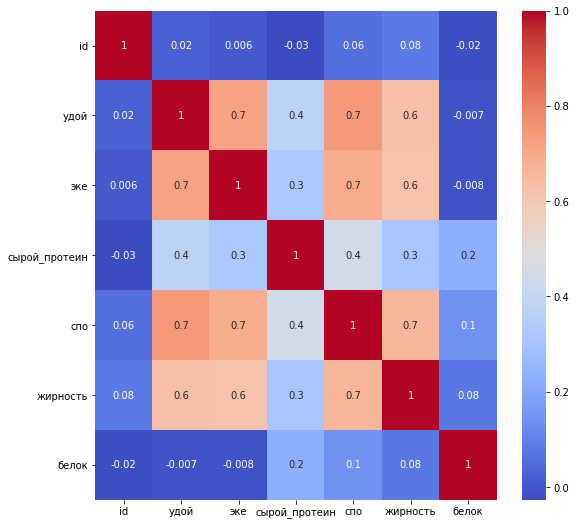

In [46]:
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(data_ferma.corr(method='spearman'), annot = True, fmt='.1g', cmap= 'coolwarm')
None

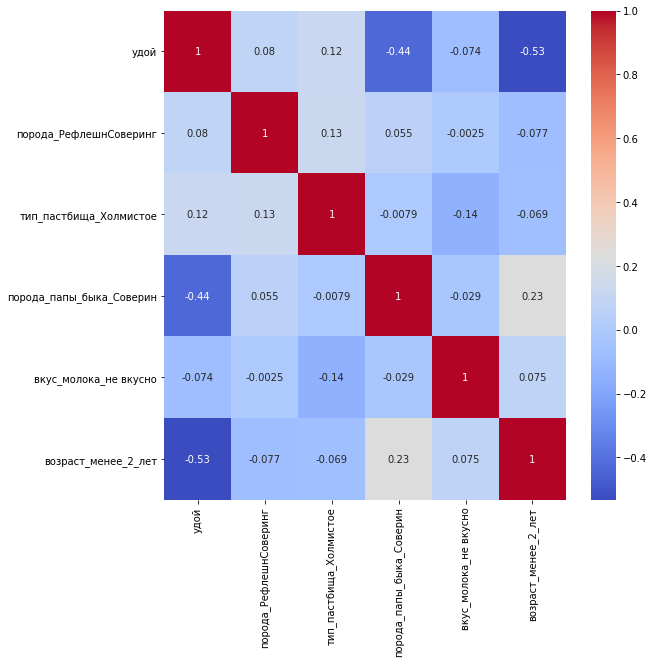

In [47]:
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(pd.get_dummies(data_ferma[['удой', 
                                           'порода', 
                                           'тип_пастбища', 
                                           'порода_папы_быка', 
                                           'вкус_молока', 
                                           'возраст']], drop_first=True).corr(method='spearman'), annot = True, fmt='.2g', cmap= 'coolwarm')
None

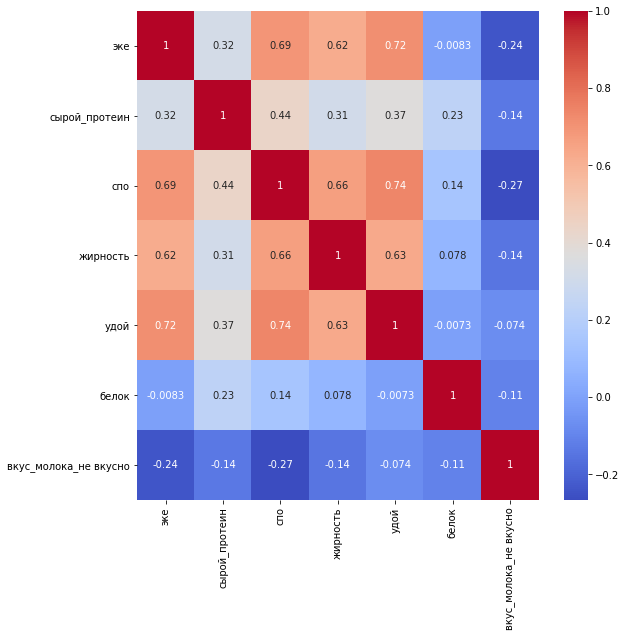

In [48]:
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(pd.get_dummies(data_ferma[['эке', 
                                           'сырой_протеин', 
                                           'спо', 
                                           'жирность', 
                                           'вкус_молока',
                                           'удой',
                                           'белок']], drop_first=True).corr(method='spearman'), annot = True, fmt='.2g', cmap= 'coolwarm')
None

### Удой и тип пастбища

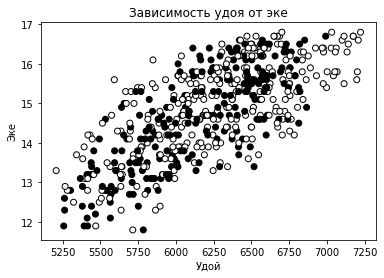

In [49]:
plt.scatter(data_ferma['удой'], data_ferma['эке'], 
            c=pd.get_dummies(data_ferma['тип_пастбища']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

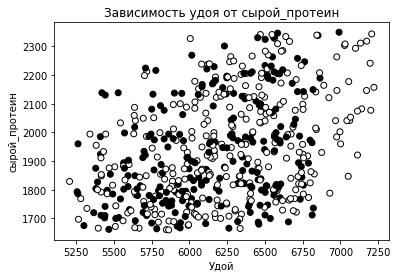

In [50]:
plt.scatter(data_ferma['удой'], data_ferma['сырой_протеин'], 
            c=pd.get_dummies(data_ferma['тип_пастбища']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от сырой_протеин")
plt.ylabel("сырой_протеин")
plt.xlabel("Удой")
None

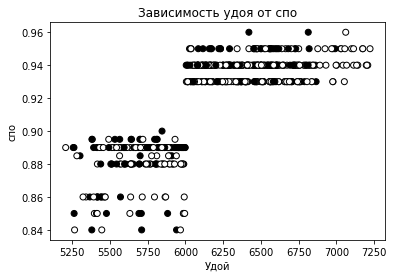

In [51]:
plt.scatter(data_ferma['удой'], data_ferma['спо'], 
            c=pd.get_dummies(data_ferma['тип_пастбища']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

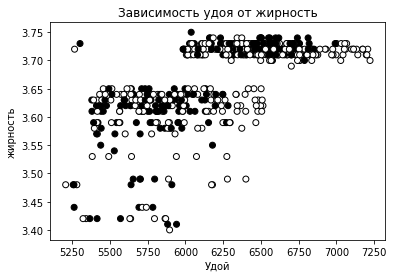

In [52]:
plt.scatter(data_ferma['удой'], data_ferma['жирность'], 
            c=pd.get_dummies(data_ferma['тип_пастбища']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от жирность")
plt.ylabel("жирность")
plt.xlabel("Удой")
None

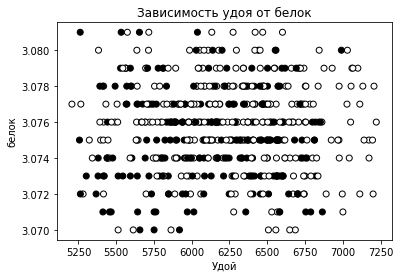

In [53]:
plt.scatter(data_ferma['удой'], data_ferma['белок'], 
            c=pd.get_dummies(data_ferma['тип_пастбища']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от белок")
plt.ylabel("белок")
plt.xlabel("Удой")
None

### Удой и порода

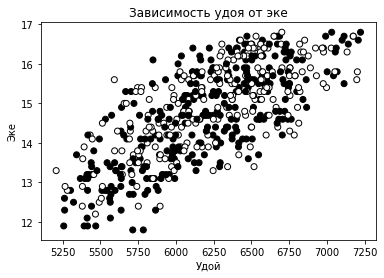

In [54]:
plt.scatter(data_ferma['удой'], data_ferma['эке'], 
            c=pd.get_dummies(data_ferma['порода']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

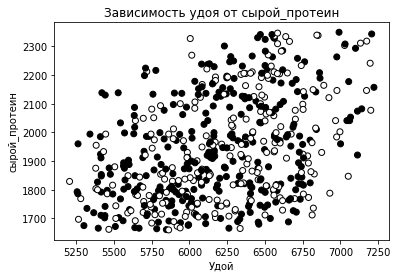

In [55]:
plt.scatter(data_ferma['удой'], data_ferma['сырой_протеин'], 
            c=pd.get_dummies(data_ferma['порода']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от сырой_протеин")
plt.ylabel("сырой_протеин")
plt.xlabel("Удой")
None

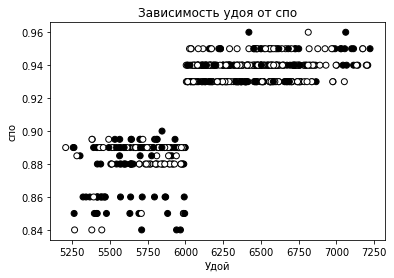

In [56]:
plt.scatter(data_ferma['удой'], data_ferma['спо'], 
            c=pd.get_dummies(data_ferma['порода']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

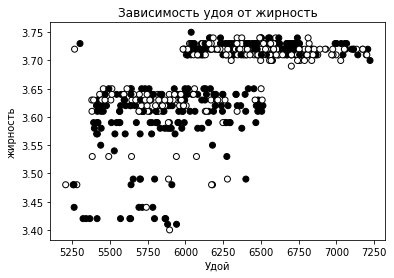

In [57]:
plt.scatter(data_ferma['удой'], data_ferma['жирность'], 
            c=pd.get_dummies(data_ferma['порода']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от жирность")
plt.ylabel("жирность")
plt.xlabel("Удой")
None

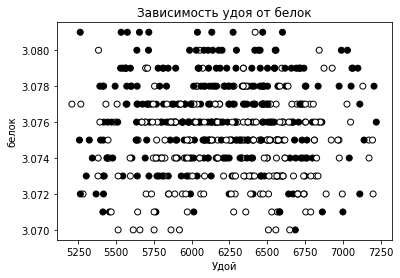

In [58]:
plt.scatter(data_ferma['удой'], data_ferma['белок'], 
            c=pd.get_dummies(data_ferma['порода']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от белок")
plt.ylabel("белок")
plt.xlabel("Удой")
None

### Удой и порода_папы_быка

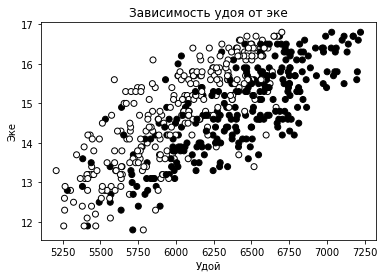

In [59]:
plt.scatter(data_ferma['удой'], data_ferma['эке'], 
            c=pd.get_dummies(data_ferma['порода_папы_быка']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

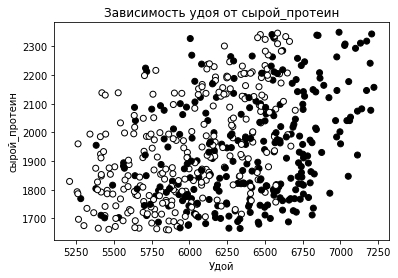

In [60]:
plt.scatter(data_ferma['удой'], data_ferma['сырой_протеин'], 
            c=pd.get_dummies(data_ferma['порода_папы_быка']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от сырой_протеин")
plt.ylabel("сырой_протеин")
plt.xlabel("Удой")
None

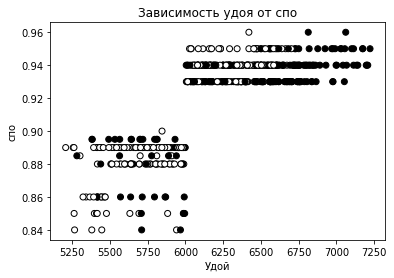

In [61]:
plt.scatter(data_ferma['удой'], data_ferma['спо'], 
            c=pd.get_dummies(data_ferma['порода_папы_быка']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

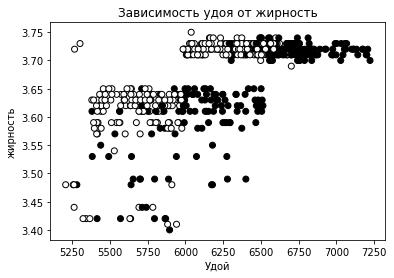

In [62]:
plt.scatter(data_ferma['удой'], data_ferma['жирность'], 
            c=pd.get_dummies(data_ferma['порода_папы_быка']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от жирность")
plt.ylabel("жирность")
plt.xlabel("Удой")
None

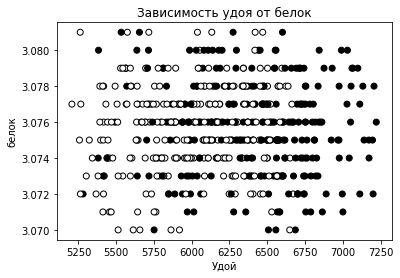

In [63]:
plt.scatter(data_ferma['удой'], data_ferma['белок'], 
            c=pd.get_dummies(data_ferma['порода_папы_быка']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от белок")
plt.ylabel("белок")
plt.xlabel("Удой")
None

### Удой и вкус молока

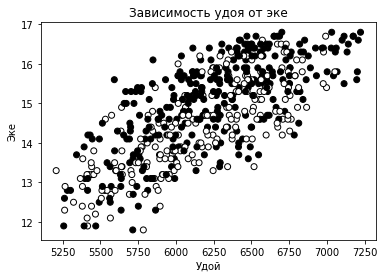

In [64]:
plt.scatter(data_ferma['удой'], data_ferma['эке'], 
            c=pd.get_dummies(data_ferma['вкус_молока']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

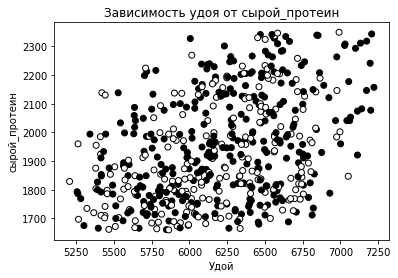

In [65]:
plt.scatter(data_ferma['удой'], data_ferma['сырой_протеин'], 
            c=pd.get_dummies(data_ferma['вкус_молока']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от сырой_протеин")
plt.ylabel("сырой_протеин")
plt.xlabel("Удой")
None

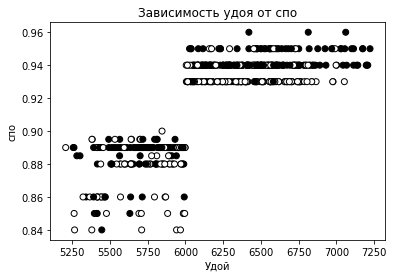

In [66]:
plt.scatter(data_ferma['удой'], data_ferma['спо'], 
            c=pd.get_dummies(data_ferma['вкус_молока']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

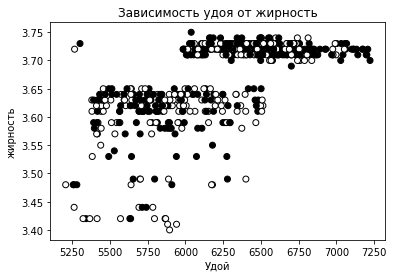

In [67]:
plt.scatter(data_ferma['удой'], data_ferma['жирность'], 
            c=pd.get_dummies(data_ferma['вкус_молока']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от жирность")
plt.ylabel("жирность")
plt.xlabel("Удой")
None

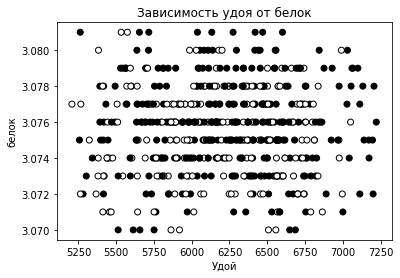

In [68]:
plt.scatter(data_ferma['удой'], data_ferma['белок'], 
            c=pd.get_dummies(data_ferma['вкус_молока']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от белок")
plt.ylabel("белок")
plt.xlabel("Удой")
None

### Возраст

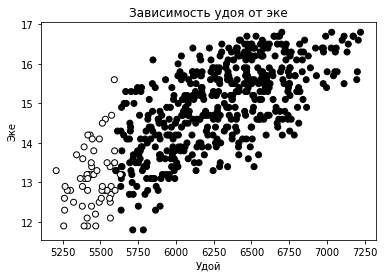

In [69]:
plt.scatter(data_ferma['удой'], data_ferma['эке'], 
            c=pd.get_dummies(data_ferma['возраст']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

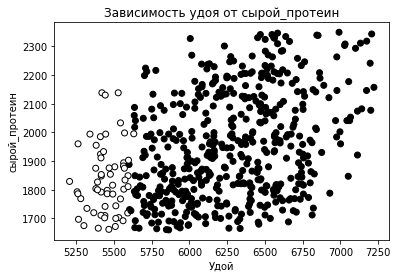

In [70]:
plt.scatter(data_ferma['удой'], data_ferma['сырой_протеин'], 
            c=pd.get_dummies(data_ferma['возраст']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от сырой_протеин")
plt.ylabel("сырой_протеин")
plt.xlabel("Удой")
None

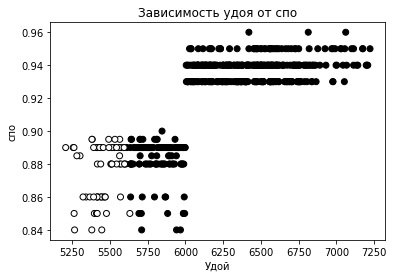

In [71]:
plt.scatter(data_ferma['удой'], data_ferma['спо'], 
            c=pd.get_dummies(data_ferma['возраст']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

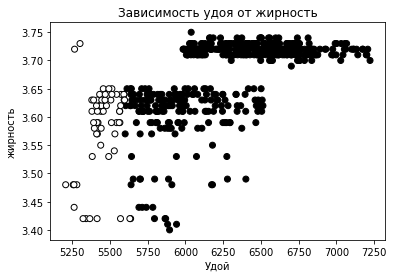

In [72]:
plt.scatter(data_ferma['удой'], data_ferma['жирность'], 
            c=pd.get_dummies(data_ferma['возраст']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от жирность")
plt.ylabel("жирность")
plt.xlabel("Удой")
None

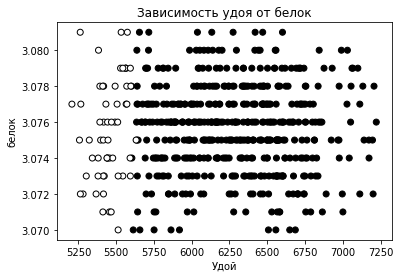

In [73]:
plt.scatter(data_ferma['удой'], data_ferma['белок'], 
            c=pd.get_dummies(data_ferma['возраст']).iloc[:,1], 
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от белок")
plt.ylabel("белок")
plt.xlabel("Удой")
None

### Вывод

Была замечена высокая корреляция целового признака удой с полями эке и спо, заметная корреляция с полем жирность и возраст, умеренная корреляция с полем сырой протеин и порода папы. Со всеми остальными полями проследить корреляцию не удалось, однако думаю очевидно, что порода дойной коровы так же должна так или иначе влиять на удой молока

Вкус молока слабо коррелирует с остальными параметрами, самая явная корееляция с параметрами эке и спо (0.2 по Пирсону), поэтому постараемся подобрать параметры логически. Понятно что состав молока так или иначе должен влиять на вкус, поэтому спо, жирность и белок берем точно. Также вероятно на вкус молока должно влиять то чем корова питается, поэтому тип пастбища и эке тоже добавим к признакам

## Линейная регрессия

### Обучение первой модели линейной регрессии

In [74]:
data_ferma.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [75]:
#data_ferma_lin = data_ferma[['удой','эке','сырой_протеин','спо','жирность','порода_папы_быка','возраст','порода', 'белок']]
#data_ferma_lin.head()

In [76]:
data_ferma_lin = data_ferma[['удой','эке','сырой_протеин','спо','порода_папы_быка','возраст','порода', 'тип_пастбища']]
data_ferma_lin.head()

,удой,эке,сырой_протеин,спо,порода_папы_быка,возраст,порода,тип_пастбища
0,5863,14.2,1743,0.890,Айдиалл,более_2_лет,Вис Бик Айдиал,Равнинное
1,5529,12.8,2138,0.890,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное
2,5810,14.0,1854,0.885,Соверин,более_2_лет,РефлешнСоверинг,Холмистое
3,5895,12.4,2012,0.885,Айдиалл,более_2_лет,РефлешнСоверинг,Холмистое
4,5302,12.8,1675,0.885,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное


In [77]:
# Разбиваю данные на тестовую и тренировочную выборку
RANDOM_STATE = 42

X = data_ferma_lin.drop('удой', axis=1)
y = data_ferma_lin['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [78]:
# Стандартизация тестовой и тренировочной выборок
scaler = StandardScaler()

df_numeric_train = X_train[['эке', 'сырой_протеин', 'спо']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

df_numeric_test = X_test[['эке', 'сырой_протеин', 'спо']]
df_numeric_sc_test = pd.DataFrame(scaler.transform(df_numeric_test))
df_numeric_sc_test.rename(mapper=dict(zip(df_numeric_sc_test.columns,df_numeric_test.columns)),axis=1,inplace=True)
print(df_numeric_sc_test.head())

        эке  сырой_протеин       спо
0  1.278302       2.206848  0.730876
1  0.774892       0.343083  0.730876
2  0.355385      -0.705285  0.399929
3 -0.735336       0.293161 -0.923860
4  0.355385      -0.666456  0.399929
        эке  сырой_протеин       спо
0  1.110499       0.176676  0.730876
1 -0.148025      -1.320993 -0.758386
2  0.858794       2.179113  1.061823
3 -0.315828      -0.039654 -1.089333
4 -0.315828      -0.577705 -1.254807


In [79]:
# Кодирование тестовой и тренировочной выборок
onehtenc = OneHotEncoder(drop='first', sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(X_train[['порода_папы_быка','возраст','порода', 'тип_пастбища']]))
print(df_one_hot.head())

df_one_hot_test = pd.DataFrame(onehtenc.transform(X_test[['порода_папы_быка','возраст','порода', 'тип_пастбища']]))
df_one_hot_test.head()

     0    1    2    3
0  0.0  0.0  1.0  1.0
1  1.0  0.0  0.0  1.0
2  0.0  0.0  1.0  0.0
3  1.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0


,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0


In [80]:
# Подготовка тестового и тренировочного датасета
df_lin_train = pd.concat([df_numeric_sc,df_one_hot],axis = 1)
df_lin_test = pd.concat([df_numeric_sc_test,df_one_hot_test],axis = 1)


In [81]:
# Инициализация и обучение модели
model_lr_1  = LinearRegression()
model_lr_1.fit(df_lin_train, y_train)

predictions = model_lr_1.predict(df_lin_test)


In [82]:
# r2 качество модели
r2_1 = r2_score(y_test, predictions)
r2_1

0.7424964626442557

In [83]:
mae_1 = mean_absolute_error(predictions, y_test )
mae_1

167.19030985139716

In [84]:
mse_1 = mean_squared_error(predictions, y_test)
mse_1

45245.23647482593

In [85]:
rmse_1 = np.sqrt(mse_1)
rmse_1

212.70927688943405

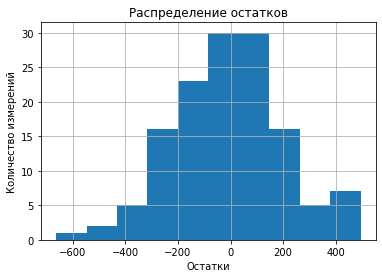

In [86]:
# Анализ остатков
residuals = y_test - predictions
residuals.hist()
plt.title("Распределение остатков")
plt.ylabel("Количество измерений")
plt.xlabel("Остатки")
None

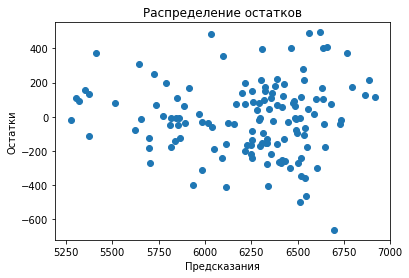

In [87]:
plt.scatter(predictions, residuals) 
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

### Вывод

Точность модели оказалась 0.742, что является неплохим результатом

Распределение остатков выглядит отлично: Нормальное распределение, симметричное относительно нуля. Однако по диаграмме рассеивания видно, что дисперссия не совсем постоянная, хотя довольно близка к этому. Попробуем устранить нелинейности и добавить еще признак.

### Обучение второй модели линейной регрессии

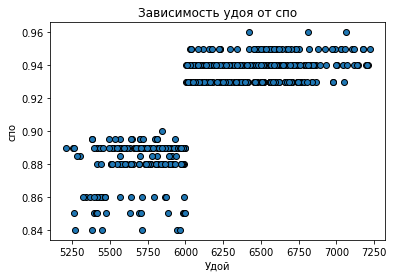

In [88]:
plt.scatter(data_ferma['удой'], data_ferma['спо'],  
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от спо")
plt.ylabel("спо")
plt.xlabel("Удой")
None

На диаграмме видно, что данные делятся на 2 кластера. Преобразуем данные столбца СПО в бинарные. Будем считать все что выше 0.92 единицей, а все что ниже 0 нулем.

In [89]:
pd.options.mode.chained_assignment = None
data_ferma_lin.loc[data_ferma_lin['спо'] > 0.92, 'спо'] = 1
data_ferma_lin.loc[data_ferma_lin['спо'] < 0.92, 'спо'] = 0
data_ferma_lin.head()

,удой,эке,сырой_протеин,спо,порода_папы_быка,возраст,порода,тип_пастбища
0,5863,14.2,1743,0.0,Айдиалл,более_2_лет,Вис Бик Айдиал,Равнинное
1,5529,12.8,2138,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное
2,5810,14.0,1854,0.0,Соверин,более_2_лет,РефлешнСоверинг,Холмистое
3,5895,12.4,2012,0.0,Айдиалл,более_2_лет,РефлешнСоверинг,Холмистое
4,5302,12.8,1675,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное


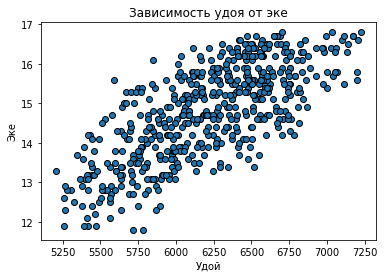

In [90]:
plt.scatter(data_ferma_lin['удой'], data_ferma_lin['эке'],  
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

Видно что эти 2 параметра лучше апроксимируются параболой в первой четверти, поэтому возведем значения столбца эке в квадрат

In [91]:
data_ferma_lin['эке_2'] = data_ferma_lin['эке'] ** 2
data_ferma_lin.head()

,удой,эке,сырой_протеин,спо,порода_папы_быка,возраст,порода,тип_пастбища,эке_2
0,5863,14.2,1743,0.0,Айдиалл,более_2_лет,Вис Бик Айдиал,Равнинное,201.64
1,5529,12.8,2138,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное,163.84
2,5810,14.0,1854,0.0,Соверин,более_2_лет,РефлешнСоверинг,Холмистое,196.00
3,5895,12.4,2012,0.0,Айдиалл,более_2_лет,РефлешнСоверинг,Холмистое,153.76
4,5302,12.8,1675,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное,163.84


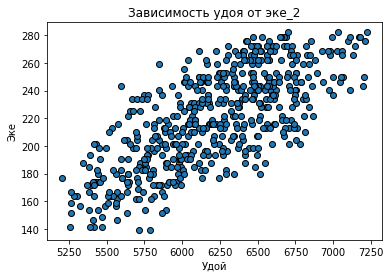

In [92]:
plt.scatter(data_ferma_lin['удой'], data_ferma_lin['эке_2'],  
            edgecolors='Black', 
            cmap='gray') 
plt.title("Зависимость удоя от эке_2")
plt.ylabel("Эке")
plt.xlabel("Удой")
None

In [93]:
data_ferma_lin = data_ferma_lin.drop('эке', axis=1)
data_ferma_lin.head()

,удой,сырой_протеин,спо,порода_папы_быка,возраст,порода,тип_пастбища,эке_2
0,5863,1743,0.0,Айдиалл,более_2_лет,Вис Бик Айдиал,Равнинное,201.64
1,5529,2138,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное,163.84
2,5810,1854,0.0,Соверин,более_2_лет,РефлешнСоверинг,Холмистое,196.00
3,5895,2012,0.0,Айдиалл,более_2_лет,РефлешнСоверинг,Холмистое,153.76
4,5302,1675,0.0,Соверин,менее_2_лет,Вис Бик Айдиал,Равнинное,163.84


In [94]:
# Разбиваю данные на тестовую и тренировочную выборку
RANDOM_STATE = 42

X = data_ferma_lin.drop('удой', axis=1)
y = data_ferma_lin['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [95]:
# Стандартизация тестовой и тренировочной выборок
scaler = StandardScaler()

df_numeric_train = X_train[[ 'эке_2', 'сырой_протеин', 'спо']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

df_numeric_test = X_test[['эке_2', 'сырой_протеин', 'спо']]
df_numeric_sc_test = pd.DataFrame(scaler.transform(df_numeric_test))
df_numeric_sc_test.rename(mapper=dict(zip(df_numeric_sc_test.columns,df_numeric_test.columns)),axis=1,inplace=True)
print(df_numeric_sc_test.head())

      эке_2  сырой_протеин       спо
0  1.321902       2.206848  0.729602
1  0.769271       0.343083  0.729602
2  0.324575      -0.705285  0.729602
3 -0.764282       0.293161 -1.370610
4  0.324575      -0.666456  0.729602
      эке_2  сырой_протеин       спо
0  1.135389       0.176676  0.729602
1 -0.190064      -1.320993 -1.370610
2  0.859937       2.179113  0.729602
3 -0.357004      -0.039654 -1.370610
4 -0.357004      -0.577705 -1.370610


In [96]:
# Кодирование тестовой и тренировочной выборок
onehtenc = OneHotEncoder(drop='first',sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(X_train[['порода_папы_быка','возраст','порода', 'тип_пастбища']]))
print(df_one_hot.head())

df_one_hot_test = pd.DataFrame(onehtenc.transform(X_test[['порода_папы_быка','возраст','порода', 'тип_пастбища']]))
df_one_hot_test.head()

     0    1    2    3
0  0.0  0.0  1.0  1.0
1  1.0  0.0  0.0  1.0
2  0.0  0.0  1.0  0.0
3  1.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0


,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0


In [97]:
# Подготовка тестового и тренировочного датасета
df_lin_train = pd.concat([df_numeric_sc,df_one_hot],axis = 1)
df_lin_test = pd.concat([df_numeric_sc_test,df_one_hot_test],axis = 1)

In [98]:
# Инициализация и обучение модели
model_lr_2  = LinearRegression()
model_lr_2.fit(df_lin_train, y_train)

predictions = model_lr_2.predict(df_lin_test)

In [99]:
# r2 качество модели
r2_2 = r2_score(y_test, predictions)
r2_2


0.7512011855373161

In [100]:
mae_2 = mean_absolute_error(predictions, y_test )
mae_2

162.16509440501383

In [101]:
mse_2 = mean_squared_error(predictions, y_test)
mse_2

43715.753618828334

In [102]:
rmse_2 = np.sqrt(mse_2)
rmse_2

209.08312609779952

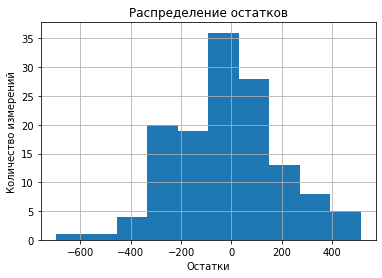

In [103]:
# Анализ остатков
residuals = y_test - predictions
residuals.hist()
plt.title("Распределение остатков")
plt.ylabel("Количество измерений")
plt.xlabel("Остатки")
None

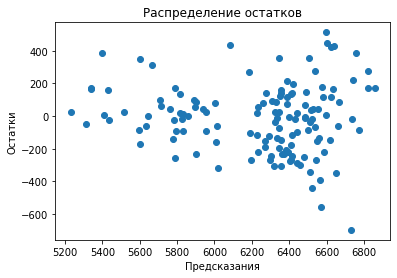

In [104]:
plt.scatter(predictions, residuals) 
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

In [105]:
print(data_ferma.shape)
print(data_ferma_lin.shape)
print(data_dad.shape)

(538, 12)
(538, 8)
(629, 2)


### Вывод

Удивительно, но устранение нелинейностей практически не повлияло на точность модели. Она осталась на отметки в 0.751

Распределение осталось нормальным, симметричным относительно нуля, что является хорошим знаком, диаграмма рассеивания также осталась похожей на то что было раньше.

### Обучение третьей модели линейной регрессии

In [106]:
data_ferma_dad = data_ferma.merge(data_dad, on='id')

In [107]:
data_ferma_lin = data_ferma_dad[['удой','эке','сырой_протеин','спо','жирность','порода_папы_быка','возраст','порода', 'белок', 'имя_папы', 'тип_пастбища']]
data_ferma_lin.isnull().sum()

удой                0
эке                 0
сырой_протеин       0
спо                 0
жирность            0
порода_папы_быка    0
возраст             0
порода              0
белок               0
имя_папы            0
тип_пастбища        0
dtype: int64

In [108]:
data_ferma_lin['эке_2'] = data_ferma_lin['эке'] ** 2
data_ferma_lin = data_ferma_lin.drop('эке', axis=1)

In [109]:
# Разбиваю данные на тестовую и тренировочную выборку
RANDOM_STATE = 42

X = data_ferma_lin.drop('удой', axis=1)
y = data_ferma_lin['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [110]:
# Стандартизация тестовой и тренировочной выборок
scaler = StandardScaler()

df_numeric_train = X_train[[ 'эке_2', 'сырой_протеин', 'спо']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

df_numeric_test = X_test[['эке_2', 'сырой_протеин', 'спо']]
df_numeric_sc_test = pd.DataFrame(scaler.transform(df_numeric_test))
df_numeric_sc_test.rename(mapper=dict(zip(df_numeric_sc_test.columns,df_numeric_test.columns)),axis=1,inplace=True)
print(df_numeric_sc_test.head())

      эке_2  сырой_протеин       спо
0  1.321902       2.206848  0.730876
1  0.769271       0.343083  0.730876
2  0.324575      -0.705285  0.399929
3 -0.764282       0.293161 -0.923860
4  0.324575      -0.666456  0.399929
      эке_2  сырой_протеин       спо
0  1.135389       0.176676  0.730876
1 -0.190064      -1.320993 -0.758386
2  0.859937       2.179113  1.061823
3 -0.357004      -0.039654 -1.089333
4 -0.357004      -0.577705 -1.254807


In [111]:
# Кодирование тестовой и тренировочной выборок
onehtenc = OneHotEncoder(drop='first', sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(X_train[['порода_папы_быка','возраст','порода', 'тип_пастбища', 'имя_папы']]))
print(df_one_hot.head())

df_one_hot_test = pd.DataFrame(onehtenc.transform(X_test[['порода_папы_быка','возраст','порода', 'тип_пастбища', 'имя_папы']]))
df_one_hot_test.head()

     0    1    2    3    4    5    6
0  0.0  0.0  1.0  1.0  1.0  0.0  0.0
1  1.0  0.0  0.0  1.0  0.0  0.0  1.0
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0


,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [112]:
# Подготовка тестового и тренировочного датасета
df_lin_train = pd.concat([df_numeric_sc,df_one_hot],axis = 1)
df_lin_test = pd.concat([df_numeric_sc_test,df_one_hot_test],axis = 1)

In [113]:
# Инициализация и обучение модели
model_lr_3  = LinearRegression()
model_lr_3.fit(df_lin_train, y_train)

predictions = model_lr_3.predict(df_lin_test)

In [114]:
# r2 качество модели
r2_3 = r2_score(y_test, predictions)
r2_3

0.774717483939084

In [115]:
mae_3 = mean_absolute_error(predictions, y_test )
mae_3

154.29693391077703

In [116]:
mse_3 = mean_squared_error(predictions, y_test)
mse_3

39583.76967357236

In [117]:
rmse_3 = np.sqrt(mse_3)
rmse_3

198.95670301242015

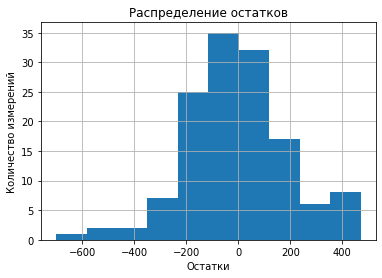

In [118]:
# Анализ остатков
residuals = y_test - predictions
residuals.hist()
plt.title("Распределение остатков")
plt.ylabel("Количество измерений")
plt.xlabel("Остатки")
None

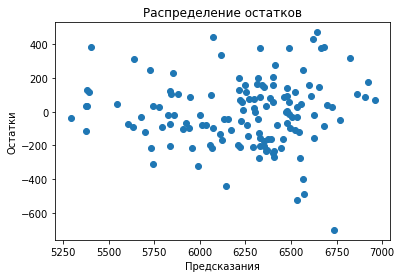

In [119]:
plt.scatter(predictions, residuals) 
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

### Вывод

После добавления еще одного признака точность модели увеличилась и стала равна 0.775

Диаграмма рассеянивания все также близка к постоянной дисперсии, однако не является идеально постоянной. РАспределение остатков все также близко в нормальному, симметричному относительно центра.

### Поиск нелинейностей

Посмотрим какой именно параметр создает нелинейность

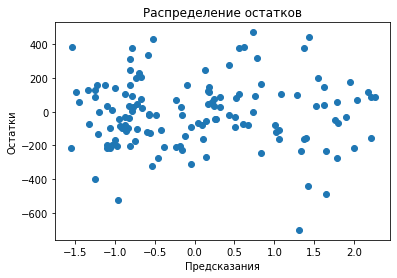

In [120]:
plt.scatter(df_lin_test['сырой_протеин'], residuals)
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

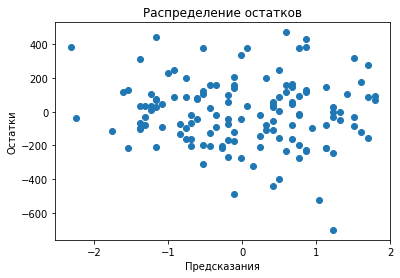

In [121]:
plt.scatter(df_lin_test['эке_2'], residuals)
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

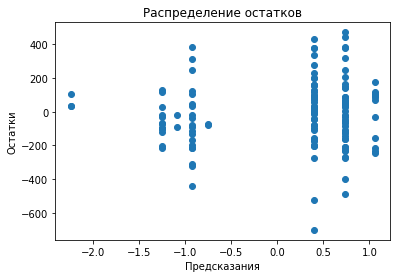

In [122]:
plt.scatter(df_lin_test['спо'], residuals)
plt.title("Распределение остатков")
plt.ylabel("Остатки")
plt.xlabel("Предсказания")
None

## Сравнение моделей

In [123]:
print(r2_1, r2_2, r2_3)

0.7424964626442557 0.7512011855373161 0.774717483939084


In [124]:
print(mae_1,mae_2,mae_3)

167.19030985139716 162.16509440501383 154.29693391077703


In [125]:
print(mse_1,mse_2,mse_3)

45245.23647482593 43715.753618828334 39583.76967357236


In [126]:
print(rmse_1,rmse_2,rmse_3)

212.70927688943405 209.08312609779952 198.95670301242015


Как видно из сравнений метрик, третья модель оказалась лучше двух других по всем метрикам сравнения, поэтому совершенно точно можно утверждать, что она с поставленной задачей справляется лучше остальных

### Прогноз линейной регрессии

Лучшая модель получилась третья, поэтому ее и будем использовать для прогнозирования

In [127]:
data_cow_lin = data_cow

In [128]:
data_cow_lin['эке_2'] = (data_ferma['эке'].mean() * 1.05) ** 2
data_cow_lin['сырой_протеин'] = (data_ferma['сырой_протеин'].mean() * 1.05) 
data_cow_lin['спо'] = (data_ferma['спо'].mean() * 1.05) 
data_cow_lin.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,240.964164,2040.475929,0.964595
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,240.964164,2040.475929,0.964595
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,240.964164,2040.475929,0.964595
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,240.964164,2040.475929,0.964595
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,240.964164,2040.475929,0.964595


In [129]:
data_cow_lin.shape

(16, 10)

In [130]:
scaler = StandardScaler()

df_numeric_train = data_cow_lin[['эке_2', 'сырой_протеин', 'спо']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

onehtenc = OneHotEncoder(drop='first',sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(data_cow_lin[['порода_папы_быка','возраст','порода', 'тип_пастбища', 'имя_папы']]))
print(df_one_hot.head())

data_cow_test = pd.concat([df_numeric_sc,df_one_hot],axis = 1)

   эке_2  сырой_протеин  спо
0    0.0            0.0  0.0
1    0.0            0.0  0.0
2    0.0            0.0  0.0
3    0.0            0.0  0.0
4    0.0            0.0  0.0
     0    1    2    3    4    5    6
0  0.0  0.0  0.0  1.0  0.0  1.0  0.0
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0
2  1.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  1.0  1.0  1.0  0.0  0.0
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0


In [131]:
predictions = model_lr_3.predict(data_cow_test)
data_cow['удой'] = predictions
data_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,спо,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,240.964164,2040.475929,0.964595,6424.795932
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,240.964164,2040.475929,0.964595,6204.784126
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,240.964164,2040.475929,0.964595,6046.275007
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,240.964164,2040.475929,0.964595,6446.164240
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,240.964164,2040.475929,0.964595,6373.115418
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,240.964164,2040.475929,0.964595,6267.775017
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,240.964164,2040.475929,0.964595,6364.276853
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,240.964164,2040.475929,0.964595,6286.671514
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,240.964164,2040.475929,0.964595,6127.760702
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,240.964164,2040.475929,0.964595,6427.267743


## Логистическая регрессия

### Обучение модели логистической регрессии

In [132]:
data_ferma.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиалл,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиалл,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [133]:
data_ferma_log = data_ferma_dad[['вкус_молока','эке','сырой_протеин','спо','жирность', 'белок' ,'тип_пастбища', 'имя_папы', 'порода', 'возраст']]
data_ferma_log

,вкус_молока,эке,сырой_протеин,спо,жирность,белок,тип_пастбища,имя_папы,порода,возраст
0,вкусно,14.2,1743,0.890,3.58,3.076,Равнинное,Буйный,Вис Бик Айдиал,более_2_лет
1,вкусно,12.8,2138,0.890,3.54,3.079,Равнинное,Соловчик,Вис Бик Айдиал,менее_2_лет
2,не вкусно,14.0,1854,0.885,3.59,3.074,Холмистое,Барин,РефлешнСоверинг,более_2_лет
3,не вкусно,12.4,2012,0.885,3.40,3.075,Холмистое,Буйный,РефлешнСоверинг,более_2_лет
4,вкусно,12.8,1675,0.885,3.73,3.073,Равнинное,Барин,Вис Бик Айдиал,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...
533,не вкусно,15.4,1964,0.940,3.74,3.075,Равнинное,Буйный,РефлешнСоверинг,более_2_лет
534,вкусно,12.9,1700,0.880,3.64,3.073,Равнинное,Барин,РефлешнСоверинг,менее_2_лет
535,не вкусно,14.4,1837,0.880,3.64,3.075,Холмистое,Барин,РефлешнСоверинг,более_2_лет
536,вкусно,13.8,1994,0.890,3.64,3.077,Равнинное,Барин,РефлешнСоверинг,более_2_лет


In [134]:
RANDOM_STATE = 42

X = data_ferma_log.drop('вкус_молока', axis=1)
y = data_ferma_log['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [135]:
scaler = StandardScaler()

df_numeric_train = X_train[['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

df_numeric_test = X_test[['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']]
df_numeric_sc_test = pd.DataFrame(scaler.transform(df_numeric_test))
df_numeric_sc_test.rename(mapper=dict(zip(df_numeric_sc_test.columns,df_numeric_test.columns)),axis=1,inplace=True)
print(df_numeric_sc_test.head())

        эке  сырой_протеин       спо  жирность     белок
0  1.278302       2.206848  0.730876  0.615452  1.860253
1  0.774892       0.343083  0.730876  0.615452  0.208971
2  0.355385      -0.705285  0.399929  0.742126 -1.442311
3 -0.735336       0.293161 -0.923860 -0.524611  0.208971
4  0.355385      -0.666456  0.399929  0.868799 -0.616670
        эке  сырой_протеин       спо  жирность     белок
0  1.110499       0.176676  0.730876  0.615452  0.208971
1 -0.148025      -1.320993 -0.758386 -1.157980  2.273074
2  0.858794       2.179113  1.061823  0.742126  1.034612
3 -0.315828      -0.039654 -1.089333 -1.157980  1.447433
4 -0.315828      -0.577705 -1.254807 -0.397938  0.621792


In [136]:
# Кодирование тестовой и тренировочной выборок
onehtenc = OneHotEncoder(drop='first', sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(X_train[['тип_пастбища', 'имя_папы', 'порода', 'возраст']]))
print(df_one_hot.head())

df_one_hot_test = pd.DataFrame(onehtenc.transform(X_test[['тип_пастбища', 'имя_папы', 'порода', 'возраст']]))
df_one_hot_test.head()

     0    1    2    3    4    5
0  1.0  1.0  0.0  0.0  1.0  0.0
1  1.0  0.0  0.0  1.0  0.0  0.0
2  0.0  1.0  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  0.0  1.0  0.0
4  0.0  1.0  0.0  0.0  0.0  0.0


,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


In [137]:
# Подготовка тестового и тренировочного датасета
df_log_train = pd.concat([df_numeric_sc,df_one_hot],axis = 1)
df_log_test = pd.concat([df_numeric_sc_test,df_one_hot_test],axis = 1)

In [138]:
clf = LogisticRegression()

clf = clf.fit(df_log_train, y_train) 
y_pred = clf.predict(df_log_test)

In [139]:
accuracy =  accuracy_score(y_pred, y_test)
print('accuracy =', accuracy)

accuracy = 0.5851851851851851


Точность оказалась не слишком большой, однако это не целевая наша метрика. Посмотрим другие метрики и настроим порог так чтобы результат метрики precision оказался наибольшим. 

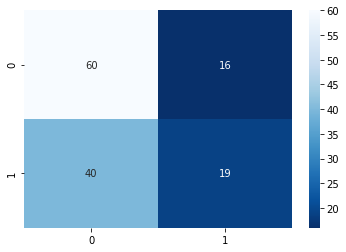

In [140]:
cm = confusion_matrix(y_test, y_pred)
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

In [141]:
recall =  recall_score(y_pred, y_test, pos_label='вкусно')
print('recall =', recall)

recall = 0.6


In [142]:
precision =  precision_score(y_pred, y_test, pos_label='вкусно')
print('precision =', precision)


precision = 0.7894736842105263


Метрика precision важнее, потому что нам важно, чтобы молоко было вкусным, и повышая точность precision, мы сможем минимизировать количество случаев, когда не вкусному молоку модель предсказывает вкусноту

In [143]:
y_proba = clf.predict_proba(df_log_test)[:,1]

data_con = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data_con) 

       y_valid   y_proba
47      вкусно  0.749994
32      вкусно  0.731090
17   не вкусно  0.698405
121     вкусно  0.663012
21   не вкусно  0.652795
..         ...       ...
105     вкусно  0.134026
2       вкусно  0.130241
14      вкусно  0.128598
90      вкусно  0.127890
52      вкусно  0.079466

[135 rows x 2 columns]


In [144]:
y_proba.max()

0.749994027107882

In [145]:
columns = []

thresholds = [round(i,2) for i in np.linspace(0.1,0.75,num = 100,endpoint=False)]

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data_con['y_pred_'+str(i)] = data_con['y_proba'].apply(lambda x: 'вкусно' if (x > i) else  'не вкусно')

data_precision = data_con.drop('y_proba', axis =1)
data_precision

,y_valid,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,y_pred_0.17,y_pred_0.18,...,y_pred_0.65,y_pred_0.66,y_pred_0.67,y_pred_0.68,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74
47,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,...,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно
32,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,...,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно
17,не вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,...,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
121,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,...,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
21,не вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,вкусно,...,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,...,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
2,вкусно,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,...,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
14,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,...,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно
90,вкусно,вкусно,вкусно,вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,...,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно,не вкусно


In [146]:
precision_score
## Поиск максимального значения precision
precision_test = 0
name_test = ''
for name, values in data_precision.iteritems():
    if precision_score(data_precision[name], y_test, pos_label='вкусно') > precision_test:
        precision_test = precision_score(data_precision[name], y_test, pos_label='вкусно')
        name_test = name
        print(precision_test, name_test)

0.5263157894736842 y_valid
0.9868421052631579 y_pred_0.1


recall = 0.5597014925373134
precision = 0.9868421052631579


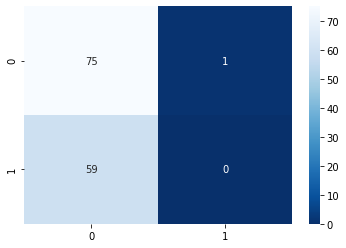

In [147]:
cm = confusion_matrix(y_test, data_con['y_pred_0.1'])
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
recall =  recall_score(data_con['y_pred_0.1'], y_test, pos_label='вкусно')
print('recall =', recall)
precision =  precision_score(data_con['y_pred_0.1'], y_test, pos_label='вкусно')
print('precision =', precision)

### Вывод

Мы старались минимизировать precision-ошибку нашей модели, и нашли оптимальное значение порога. Максимальное значение precision(0.987), оказалось при пороге в y_pred = 0.1. Значения recall при этом пороге равняется 0.560

### Прогноз логистической регрессии

In [148]:
data_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,спо,удой
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,240.964164,2040.475929,0.964595,6424.795932
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,240.964164,2040.475929,0.964595,6204.784126
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,240.964164,2040.475929,0.964595,6046.275007
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,240.964164,2040.475929,0.964595,6446.164240
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,240.964164,2040.475929,0.964595,6373.115418
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,240.964164,2040.475929,0.964595,6267.775017
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,240.964164,2040.475929,0.964595,6364.276853
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,240.964164,2040.475929,0.964595,6286.671514
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,240.964164,2040.475929,0.964595,6127.760702
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,240.964164,2040.475929,0.964595,6427.267743


In [149]:
data_ferma_log = data_cow[['эке_2', 'сырой_протеин','спо','жирность', 'белок' ,'тип_пастбища', 'имя_папы', 'порода', 'возраст']]
data_ferma_log['эке_2'] = data_ferma_log['эке_2'] ** 0.5
data_ferma_log.rename(columns = {'эке_2':'эке'}, inplace = True )
data_ferma_log

,эке,сырой_протеин,спо,жирность,белок,тип_пастбища,имя_папы,порода,возраст
0,15.52302,2040.475929,0.964595,3.58,3.076,холмистое,Геркулес,Вис Бик Айдиал,более_2_лет
1,15.52302,2040.475929,0.964595,3.54,3.081,равнинное,Буйный,Вис Бик Айдиал,менее_2_лет
2,15.52302,2040.475929,0.964595,3.59,3.074,равнинное,Барин,РефлешнСоверинг,более_2_лет
3,15.52302,2040.475929,0.964595,3.40,3.061,холмистое,Буйный,РефлешнСоверинг,более_2_лет
4,15.52302,2040.475929,0.964595,3.64,3.074,равнинное,Буйный,РефлешнСоверинг,более_2_лет
5,15.52302,2040.475929,0.964595,3.63,3.053,равнинное,Геркулес,РефлешнСоверинг,менее_2_лет
7,15.52302,2040.475929,0.964595,3.57,3.079,равнинное,Буйный,Вис Бик Айдиал,более_2_лет
9,15.52302,2040.475929,0.964595,3.40,3.079,холмистое,Буйный,РефлешнСоверинг,менее_2_лет
10,15.52302,2040.475929,0.964595,3.73,3.055,холмистое,Соловчик,Вис Бик Айдиал,более_2_лет
11,15.52302,2040.475929,0.964595,3.73,3.073,равнинное,Геркулес,РефлешнСоверинг,более_2_лет


In [150]:
scaler = StandardScaler()

df_numeric_train = data_ferma_log[['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']]
df_numeric_sc = pd.DataFrame(scaler.fit_transform(df_numeric_train))
df_numeric_sc.rename(mapper=dict(zip(df_numeric_sc.columns,df_numeric_train.columns)),axis=1,inplace=True)
print(df_numeric_sc.head())

onehtenc = OneHotEncoder(drop='first',sparse=False)
df_one_hot = pd.DataFrame(onehtenc.fit_transform(data_ferma_log[['тип_пастбища', 'имя_папы', 'порода', 'возраст']]))
print(df_one_hot.head())

data_cow_test_log = pd.concat([df_numeric_sc,df_one_hot],axis = 1)

   эке  сырой_протеин  спо  жирность     белок
0  0.0            0.0  0.0  0.059253  0.710628
1  0.0            0.0  0.0 -0.232455  1.169098
2  0.0            0.0  0.0  0.132181  0.527240
3  0.0            0.0  0.0 -1.253436 -0.664781
4  0.0            0.0  0.0  0.496816  0.527240
     0    1    2    3    4    5
0  1.0  0.0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  0.0  1.0  0.0
3  1.0  1.0  0.0  0.0  1.0  0.0
4  0.0  1.0  0.0  0.0  1.0  0.0


In [151]:
predictions_log = clf.predict(data_cow_test_log)
data_cow['proba_log']  = clf.predict_proba(data_cow_test_log)[:,1]
data_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,спо,удой,proba_log
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,240.964164,2040.475929,0.964595,6424.795932,0.378137
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,240.964164,2040.475929,0.964595,6204.784126,0.376018
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,240.964164,2040.475929,0.964595,6046.275007,0.335232
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,240.964164,2040.475929,0.964595,6446.164240,0.403120
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,240.964164,2040.475929,0.964595,6373.115418,0.447828
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,240.964164,2040.475929,0.964595,6267.775017,0.535347
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,240.964164,2040.475929,0.964595,6364.276853,0.418841
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,240.964164,2040.475929,0.964595,6286.671514,0.296843
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,240.964164,2040.475929,0.964595,6127.760702,0.456694
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,240.964164,2040.475929,0.964595,6427.267743,0.483694


In [152]:
def milk_taste(row):
    if row['proba_log'] > 0.1:
        return 'вкусно'
    else:
        return 'не вкусно'


In [153]:
data_cow['вкус_молока'] = data_cow.apply(lambda row : milk_taste(row), axis=1)
data_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,спо,удой,proba_log,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,240.964164,2040.475929,0.964595,6424.795932,0.378137,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,240.964164,2040.475929,0.964595,6204.784126,0.376018,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,240.964164,2040.475929,0.964595,6046.275007,0.335232,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,240.964164,2040.475929,0.964595,6446.164240,0.403120,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,240.964164,2040.475929,0.964595,6373.115418,0.447828,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,240.964164,2040.475929,0.964595,6267.775017,0.535347,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,240.964164,2040.475929,0.964595,6364.276853,0.418841,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,240.964164,2040.475929,0.964595,6286.671514,0.296843,вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,240.964164,2040.475929,0.964595,6127.760702,0.456694,вкусно
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,240.964164,2040.475929,0.964595,6427.267743,0.483694,вкусно


In [154]:
data_cow['удой'].describe()

count      16.000000
mean     6282.331925
std       159.145117
min      5917.651504
25%      6185.528270
50%      6325.474183
75%      6424.795932
max      6446.164240
Name: удой, dtype: float64

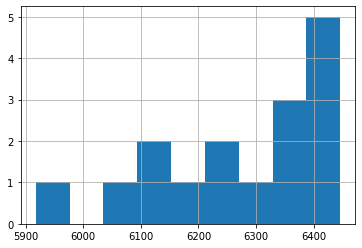

In [159]:
data_cow['удой'].hist(bins=9)
None

Видно что значения предсказанного удоя в целом довольно правдоподобны, хотя и судить об этом пока рано, учитывая количество измерений.   
  
С предсказаниями вкуса молока все сложнее, по

## Итоговые выводы

В ходе предобработки данных названия стоблцов были приведены к нижнему регистру и изменены для удобства дальнейшего исследования.   
Был изменен тип данных на числовой у тех столбцов, в которых хранились числа формата object.   
Были исследованы явные и неявные дубликаты, устранена аномалия в столбце удой.  
  
В процессе ислледовательсткого анализа были построены графики всех параметров, а так же их ящики-с-усами. Были обработаны и изучены выбросы, были построены и изучены круговые диаграммы для бинарных столбцов.  
  
Был проведен корреляционный анализ в ходе которого мы искали закономерности между данными, а также их изучали. Для установления закономерностей мы использовали метод Спирмана.

Были построены 3 модели линейной модели которые предсказывали уд, обучены и протестированы на данных. Среди них была найдена лучшая, которую мы применили в прогнозировании результата. Лучшей оказалась модель, в которой была устранена нелинейность некоторых полей, а также в которую мы добавили дополнительный параметр.
  
Так же была обучена модель логистической регрессии для предсказания вкусное или невкусное будет молоко. В этой модели нам было необходимо достичь максимального значения метрики presicion. Для этого мы изменили порого и в итоге достигли presicion = 0.98.